<a href="https://colab.research.google.com/github/Aishaamalik/Mental-Health-Economic-Indicators-Project-/blob/main/PROJECT_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mental Health & Economic Indicators Project**

----
----

# 1: DATA EXPLORATION

## 1: Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## 2: Loading the Data

In [ ]:
df = pd.read_csv('survey.csv')


## 3: Dataset Overview

In [ ]:
print(" DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

 DATASET OVERVIEW
------------------------------
Dataset shape: (1259, 27)
Number of rows: 1259
Number of columns: 27


## 4: Column Names

In [ ]:
print(" COLUMN NAMES")
print("-" * 30)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

 COLUMN NAMES
------------------------------
 1. Timestamp
 2. Age
 3. Gender
 4. Country
 5. state
 6. self_employed
 7. family_history
 8. treatment
 9. work_interfere
10. no_employees
11. remote_work
12. tech_company
13. benefits
14. care_options
15. wellness_program
16. seek_help
17. anonymity
18. leave
19. mental_health_consequence
20. phys_health_consequence
21. coworkers
22. supervisor
23. mental_health_interview
24. phys_health_interview
25. mental_vs_physical
26. obs_consequence
27. comments


## 5: Data Types

In [ ]:
print("DATA TYPES")
print("-" * 30)
print(df.dtypes)

DATA TYPES
------------------------------
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments              

## 6: First and last five row display

In [ ]:

print("\n FIRST 5 ROWS")
print("-" * 30)
print(df.head())

print("\n LAST 5 ROWS")
print("-" * 30)
print(df.tail())


 FIRST 5 ROWS
------------------------------
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy          

## 7: Numerical Columns Statistics

In [ ]:
print("\n NUMERICAL COLUMNS STATISTICS")
print("-" * 30)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if numerical_cols:
    print(df[numerical_cols].describe())
else:
    print("No numerical columns found")


 NUMERICAL COLUMNS STATISTICS
------------------------------
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


## 8: Missing Values Analysis

In [ ]:
print("\n MISSING VALUES ANALYSIS")
print("-" * 30)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df.to_string(index=False))


 MISSING VALUES ANALYSIS
------------------------------
        Column  Missing_Count  Missing_Percentage
      comments           1095           86.973789
         state            515           40.905481
work_interfere            264           20.969023
 self_employed             18            1.429706


## 9: Unique Values Count


In [ ]:
print("\n UNIQUE VALUES COUNT")
print("-" * 30)
unique_counts = df.nunique().sort_values(ascending=False)
for col, count in unique_counts.items():
    print(f"{col}: {count} unique values")

## 10:  Key Categorical Variables Distribution

In [ ]:
print("\n KEY CATEGORICAL VARIABLES DISTRIBUTION")
print("-" * 30)

key_columns = ['Age', 'Gender', 'Country', 'treatment', 'work_interfere',
               'family_history', 'self_employed', 'tech_company', 'remote_work']

for col in key_columns:
    if col in df.columns:
        print(f"\n{col.upper()} Distribution:")
        value_counts = df[col].value_counts()
        print(value_counts.head(10))
        print(f"Total unique values: {df[col].nunique()}")


 KEY CATEGORICAL VARIABLES DISTRIBUTION
------------------------------

AGE Distribution:
Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
Name: count, dtype: int64
Total unique values: 53

GENDER Distribution:
Gender
Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Make        4
Male        3
Name: count, dtype: int64
Total unique values: 49

COUNTRY Distribution:
Country
United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64
Total unique values: 48

TREATMENT Distribution:
treatment
Yes    637
No     622
Name: count, dtype: int64
Total unique values: 2

WORK_INTERFERE Distribution:
work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


## 11: Age Analysis

In [ ]:
if 'Age' in df.columns:
    try:
        age_numeric = pd.to_numeric(df['Age'], errors='coerce')
        print(f"\nAGE STATISTICS:")
        print(f"Mean age: {age_numeric.mean():.2f}")
        print(f"Median age: {age_numeric.median():.2f}")
        print(f"Min age: {age_numeric.min()}")
        print(f"Max age: {age_numeric.max()}")
        print(f"Standard deviation: {age_numeric.std():.2f}")
    except:
        print("\nAge column contains non-numeric values")


AGE STATISTICS:
Mean age: 79428148.31
Median age: 31.00
Min age: -1726
Max age: 99999999999
Standard deviation: 2818299442.98


## 12: Treatment Analysis

In [ ]:
if 'treatment' in df.columns:
    print(f"\n TREATMENT ANALYSIS")
    print("-" * 30)
    treatment_counts = df['treatment'].value_counts()
    print("Treatment distribution:")
    print(treatment_counts)
    print(f"\nTreatment percentage:")
    print((treatment_counts / len(df) * 100).round(2))


 TREATMENT ANALYSIS
------------------------------
Treatment distribution:
treatment
Yes    637
No     622
Name: count, dtype: int64

Treatment percentage:
treatment
Yes    50.6
No     49.4
Name: count, dtype: float64


## 13: Gender Analysis

In [ ]:
if 'Gender' in df.columns:
    print(f"\n GENDER ANALYSIS")
    print("-" * 30)
    gender_counts = df['Gender'].value_counts()
    print("Gender distribution:")
    print(gender_counts.head(10))


 GENDER ANALYSIS
------------------------------
Gender distribution:
Gender
Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Make        4
Male        3
Name: count, dtype: int64


## 14: Country Analysis

In [ ]:
if 'Country' in df.columns:
    print(f"\n COUNTRY ANALYSIS")
    print("-" * 30)
    country_counts = df['Country'].value_counts()
    print("Top 10 countries:")
    print(country_counts.head(10))


 COUNTRY ANALYSIS
------------------------------
Top 10 countries:
Country
United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64


## 15: Work Interference

In [ ]:
if 'work_interfere' in df.columns:
    print(f"\n WORK INTERFERENCE ANALYSIS")
    print("-" * 30)
    work_counts = df['work_interfere'].value_counts()
    print("Work interference distribution:")
    print(work_counts)


 WORK INTERFERENCE ANALYSIS
------------------------------
Work interference distribution:
work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


## 16: Company Size

In [ ]:
if 'no_employees' in df.columns:
    print(f"\n COMPANY SIZE ANALYSIS")
    print("-" * 30)
    company_size_counts = df['no_employees'].value_counts()
    print("Company size distribution:")
    print(company_size_counts)


 COMPANY SIZE ANALYSIS
------------------------------
Company size distribution:
no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: count, dtype: int64


## 17: Generating Visualizations

### A: Treatment distribution


TREATMENT DISTRIBUTION VISUALIZATION
----------------------------------------

Treatment Data Summary:
treatment
Yes    637
No     622
Name: count, dtype: int64


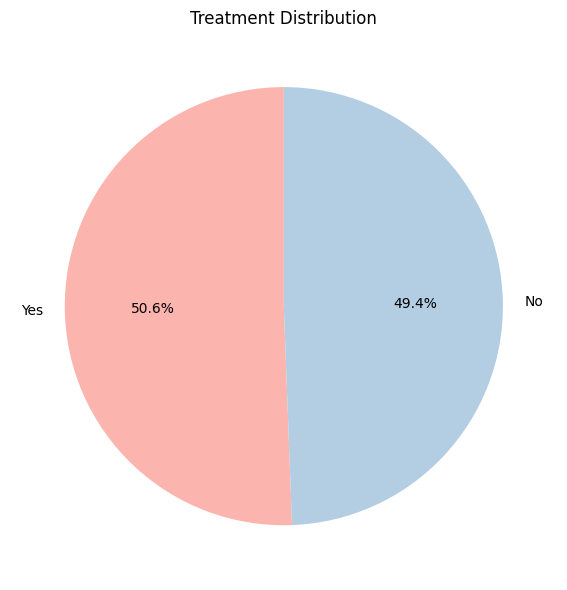

In [ ]:

print("\nTREATMENT DISTRIBUTION VISUALIZATION")
print("-" * 40)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(6, 6))

if 'treatment' in df.columns:
    treatment_counts = df['treatment'].value_counts()

    print("\nTreatment Data Summary:")
    print(treatment_counts)

    ax.pie(
        treatment_counts.values,
        labels=treatment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Pastel1.colors
    )
    ax.set_title('Treatment Distribution')
else:
    print("\nError: 'treatment' column not found in the dataset.")
    ax.text(0.5, 0.5, 'Treatment column not found', ha='center', va='center')
    ax.set_title('Error: Treatment Data Missing')

plt.tight_layout()
plt.show()


### B: Age Distribution


AGE DISTRIBUTION VISUALIZATION
----------------------------------------

Age Data Summary:
count    1254.000000
mean       32.019139
std         7.375005
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


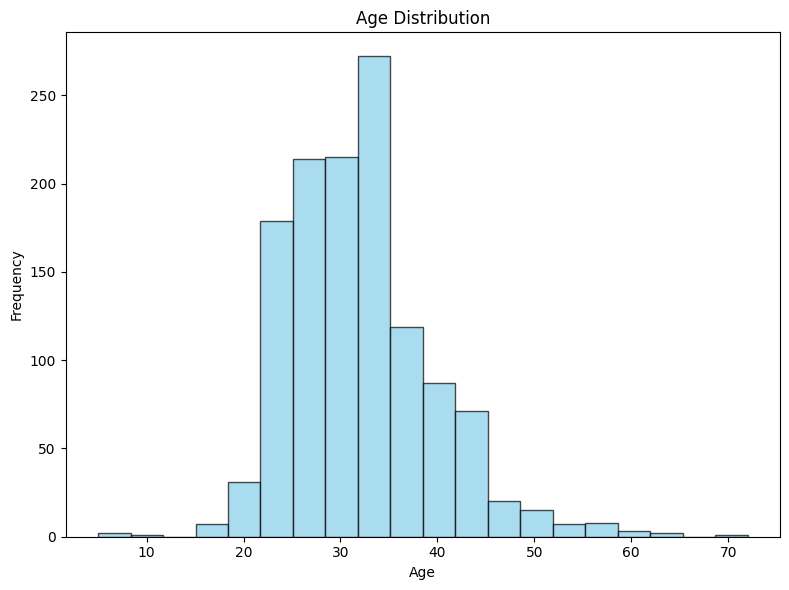

In [ ]:

print("\nAGE DISTRIBUTION VISUALIZATION")
print("-" * 40)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 6))

if 'Age' in df.columns:
    try:
        age_numeric = pd.to_numeric(df['Age'], errors='coerce')
        age_cleaned = age_numeric[(age_numeric >= 0) & (age_numeric <= 100)].dropna()

        print("\nAge Data Summary:")
        print(age_cleaned.describe())

        ax.hist(
            age_cleaned,
            bins=20,
            edgecolor='black',
            alpha=0.7,
            color='skyblue'
        )
        ax.set_title('Age Distribution')
        ax.set_xlabel('Age')
        ax.set_ylabel('Frequency')
    except Exception as e:
        print("\nError processing age data:", str(e))
        ax.text(0.5, 0.5, 'Error processing age data', ha='center', va='center')
        ax.set_title('Age Distribution - Error')
else:
    print("\nError: 'Age' column not found in the dataset.")
    ax.text(0.5, 0.5, 'Age column not found', ha='center', va='center')
    ax.set_title('Error: Age Data Missing')

plt.tight_layout()
plt.show()


### C: Gender Distribution


GENDER DISTRIBUTION VISUALIZATION
---------------------------------------------

Top 10 Gender Categories:
Gender
Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Make        4
Male        3
Name: count, dtype: int64


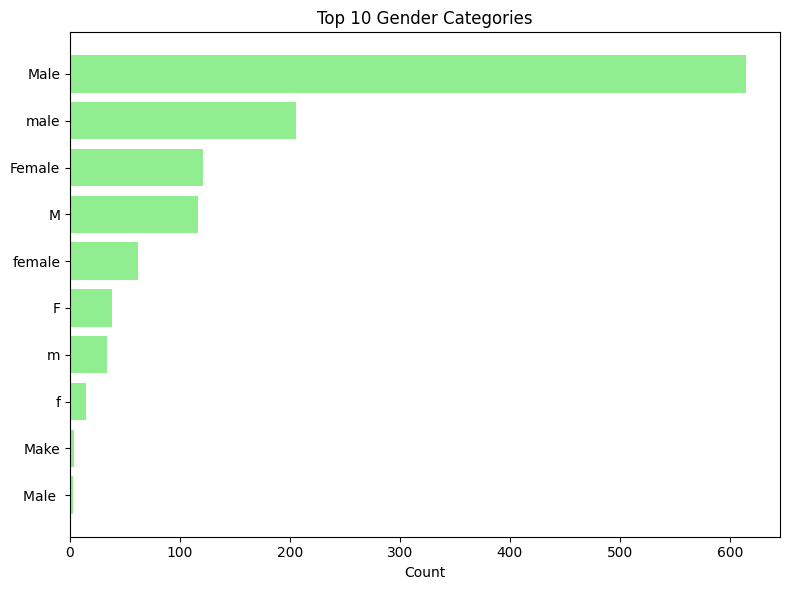

In [ ]:

print("\nGENDER DISTRIBUTION VISUALIZATION")
print("-" * 45)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 6))

if 'Gender' in df.columns:
    gender_top10 = df['Gender'].value_counts().head(10)

    print("\nTop 10 Gender Categories:")
    print(gender_top10)

    ax.barh(
        range(len(gender_top10)),
        gender_top10.values,
        color='lightgreen'
    )
    ax.set_yticks(range(len(gender_top10)))
    ax.set_yticklabels(gender_top10.index)
    ax.set_title('Top 10 Gender Categories')
    ax.set_xlabel('Count')
    ax.invert_yaxis()
else:
    print("\nError: 'Gender' column not found in the dataset.")
    ax.text(0.5, 0.5, 'Gender column not found', ha='center', va='center')
    ax.set_title('Error: Gender Data Missing')

plt.tight_layout()
plt.show()


### D:  Work Interference Distribution


WORK INTERFERENCE DISTRIBUTION VISUALIZATION
--------------------------------------------------

Work Interference Data Summary:
work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


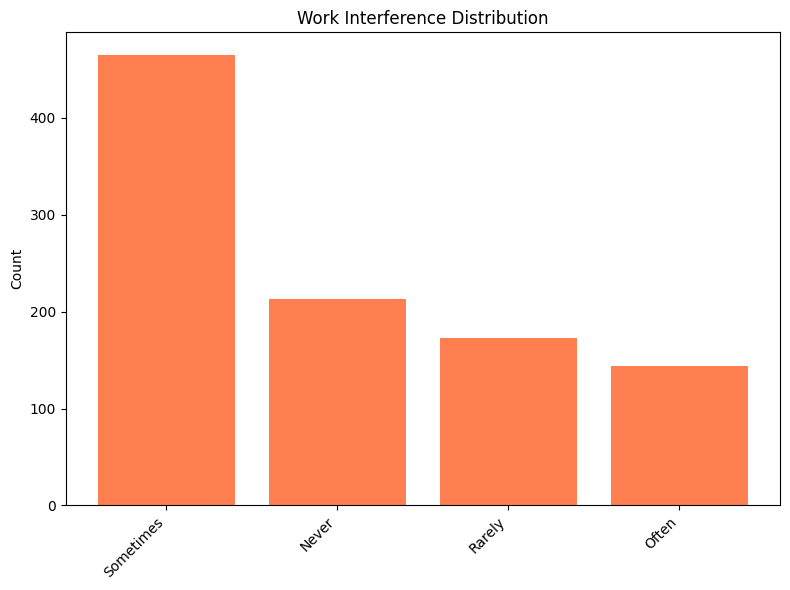

In [ ]:

print("\nWORK INTERFERENCE DISTRIBUTION VISUALIZATION")
print("-" * 50)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 6))

if 'work_interfere' in df.columns:
    work_counts = df['work_interfere'].value_counts()

    print("\nWork Interference Data Summary:")
    print(work_counts)

    ax.bar(
        range(len(work_counts)),
        work_counts.values,
        color='coral'
    )
    ax.set_xticks(range(len(work_counts)))
    ax.set_xticklabels(work_counts.index, rotation=45, ha='right')
    ax.set_title('Work Interference Distribution')
    ax.set_ylabel('Count')
else:
    print("\nError: 'work_interfere' column not found in the dataset.")
    ax.text(0.5, 0.5, 'work_interfere column not found', ha='center', va='center')
    ax.set_title('Error: Work Interference Data Missing')

plt.tight_layout()
plt.show()


## 18: Summary Statistics

In [ ]:
print("\n EXPLORATION SUMMARY")
print("-" * 30)
print(f"Total records: {len(df)}")
print(f"Total features: {len(df.columns)}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Complete cases: {len(df.dropna())}")
print(f"Completion rate: {(len(df.dropna()) / len(df) * 100):.2f}%")



 EXPLORATION SUMMARY
------------------------------
Total records: 1259
Total features: 27
Missing values: 1892
Complete cases: 86
Completion rate: 6.83%


## 19: Data Quality Checks

In [ ]:
print("\n POTENTIAL DATA QUALITY ISSUES")
print("-" * 30)

if 'Age' in df.columns:
    try:
        age_numeric = pd.to_numeric(df['Age'], errors='coerce')
        negative_ages = age_numeric < 0
        if negative_ages.any():
            print(f"Found {negative_ages.sum()} negative age values")
        extreme_ages = (age_numeric > 100) | (age_numeric < 10)
        if extreme_ages.any():
            print(f"Found {extreme_ages.sum()} extreme age values (>100 or <10)")
    except:
        print("Could not analyze age for quality issues")

if 'Gender' in df.columns:
    gender_unique = df['Gender'].str.lower().str.strip().value_counts()
    print(f"Gender has {len(gender_unique)} unique entries (case-insensitive)")


 POTENTIAL DATA QUALITY ISSUES
------------------------------
Found 3 negative age values
Found 7 extreme age values (>100 or <10)
Gender has 41 unique entries (case-insensitive)


----
----

# 2: Data Cleaning & Pre-processing

## 1: Required Libraries

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import re
df = pd.read_csv('survey.csv')

print(f"Original dataset shape: {df.shape}")

df_cleaned = df.copy()


Original dataset shape: (1259, 27)


## 2: Clean Age Column

In [ ]:
print("\n CLEANING AGE COLUMN")
print("-" * 30)

df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
age_issues = df_cleaned['Age'] < 0
extreme_ages = (df_cleaned['Age'] > 100) | (df_cleaned['Age'] < 10)

print(f"Negative ages found: {age_issues.sum()}")
print(f"Extreme ages found: {extreme_ages.sum()}")

df_cleaned.loc[age_issues, 'Age'] = np.nan
df_cleaned.loc[extreme_ages, 'Age'] = np.nan

age_median = df_cleaned['Age'].median()
df_cleaned['Age'].fillna(age_median, inplace=True)
print(f"Missing ages imputed with median: {age_median}")



 CLEANING AGE COLUMN
------------------------------
Negative ages found: 3
Extreme ages found: 7
Missing ages imputed with median: 31.0


<ipython-input-51-1420824449>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(age_median, inplace=True)


## 3: Standardize Gender Column

In [ ]:
print("\n STANDARDIZING GENDER COLUMN")
print("-" * 30)

gender_mapping = {
    'male': 'Male', 'm': 'Male', 'maile': 'Male', 'mal': 'Male', 'male-ish': 'Male',
    'male (cis)': 'Male', 'male ': 'Male', 'cis male': 'Male', 'make': 'Male',
    'guy (-ish) ^_^': 'Male', 'mail': 'Male', 'malr': 'Male', 'cis man': 'Male',
    'msle': 'Male', 'dude': 'Male', 'man': 'Male',
    'ostensibly male, unsure what that really means': 'Male', 'something kinda male?': 'Male',

    'female': 'Female', 'f': 'Female', 'woman': 'Female', 'femake': 'Female',
    'female ': 'Female', 'cis female': 'Female', 'female (cis)': 'Female',
    'femail': 'Female', 'cis-female/femme': 'Female', 'female (trans)': 'Female',
    'trans-female': 'Female', 'female or multi-gender femme': 'Female', 'female/woman': 'Female',
    'fem': 'Female', 'woman ': 'Female', 'femme': 'Female', 'trans woman': 'Female',

    'non-binary': 'Non-binary', 'genderqueer': 'Non-binary', 'androgyne': 'Non-binary',
    'agender': 'Non-binary', 'bigender': 'Non-binary', 'gender fluid': 'Non-binary',
    'enby': 'Non-binary', 'fluid': 'Non-binary', 'questioning': 'Non-binary',
    'genderflux': 'Non-binary', 'non-binary/genderfluid': 'Non-binary',
    'queer/she/they': 'Non-binary', 'all': 'Non-binary',

    'a little about you': 'Other', 'p': 'Other', 'nah': 'Other', 'neuter': 'Other'
}

df_cleaned['Gender'] = df_cleaned['Gender'].str.lower().str.strip()
df_cleaned['Gender'] = df_cleaned['Gender'].map(gender_mapping).fillna('Other')

print("Gender standardization completed")
print(df_cleaned['Gender'].value_counts())



 STANDARDIZING GENDER COLUMN
------------------------------
Gender standardization completed
Gender
Male          994
Female        251
Non-binary      8
Other           6
Name: count, dtype: int64


## 4: Map Binary and Ternary Categorical Variables

In [ ]:
print("\n STANDARDIZING CATEGORICAL VARIABLES")
print("-" * 30)

categorical_mappings = {
    'self_employed': {'Yes': 1, 'No': 0},
    'family_history': {'Yes': 1, 'No': 0},
    'treatment': {'Yes': 1, 'No': 0},
    'remote_work': {'Yes': 1, 'No': 0},
    'tech_company': {'Yes': 1, 'No': 0},
    'benefits': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'care_options': {'Yes': 1, 'No': 0, 'Not sure': 0.5},
    'wellness_program': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'seek_help': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'anonymity': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'mental_health_consequence': {'Yes': 1, 'No': 0, 'Maybe': 0.5},
    'phys_health_consequence': {'Yes': 1, 'No': 0, 'Maybe': 0.5},
    'coworkers': {'Yes': 1, 'No': 0, 'Some of them': 0.5},
    'supervisor': {'Yes': 1, 'No': 0, 'Some of them': 0.5},
    'mental_health_interview': {'Yes': 1, 'No': 0, 'Maybe': 0.5},
    'phys_health_interview': {'Yes': 1, 'No': 0, 'Maybe': 0.5},
    'mental_vs_physical': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'obs_consequence': {'Yes': 1, 'No': 0}
}

for col, mapping in categorical_mappings.items():
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].map(mapping)
        print(f"Mapped {col}: {df_cleaned[col].value_counts().to_dict()}")



 STANDARDIZING CATEGORICAL VARIABLES
------------------------------
Mapped self_employed: {0.0: 1095, 1.0: 146}
Mapped family_history: {0: 767, 1: 492}
Mapped treatment: {1: 637, 0: 622}
Mapped remote_work: {0: 883, 1: 376}
Mapped tech_company: {1: 1031, 0: 228}
Mapped benefits: {1.0: 477, 0.5: 408, 0.0: 374}
Mapped care_options: {0.0: 501, 1.0: 444, 0.5: 314}
Mapped wellness_program: {0.0: 842, 1.0: 229, 0.5: 188}
Mapped seek_help: {0.0: 646, 0.5: 363, 1.0: 250}
Mapped anonymity: {0.5: 819, 1.0: 375, 0.0: 65}
Mapped mental_health_consequence: {0.0: 490, 0.5: 477, 1.0: 292}
Mapped phys_health_consequence: {0.0: 925, 0.5: 273, 1.0: 61}
Mapped coworkers: {0.5: 774, 0.0: 260, 1.0: 225}
Mapped supervisor: {1.0: 516, 0.0: 393, 0.5: 350}
Mapped mental_health_interview: {0.0: 1008, 0.5: 207, 1.0: 44}
Mapped phys_health_interview: {0.5: 557, 0.0: 500, 1.0: 202}
Mapped mental_vs_physical: {0.5: 576, 1.0: 343, 0.0: 340}
Mapped obs_consequence: {0: 1075, 1: 184}


## 5: Map Ordinal Variables

In [ ]:


work_interfere_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3}
leave_mapping = {'Very easy': 4, 'Somewhat easy': 3, "Don't know": 2, 'Somewhat difficult': 1, 'Very difficult': 0}
company_size_mapping = {'1-5': 1, '6-25': 2, '26-100': 3, '100-500': 4, '500-1000': 5, 'More than 1000': 6}

df_cleaned['work_interfere'] = df_cleaned['work_interfere'].map(work_interfere_mapping)
df_cleaned['leave'] = df_cleaned['leave'].map(leave_mapping)
df_cleaned['no_employees'] = df_cleaned['no_employees'].map(company_size_mapping)


## 6: Handle Country Information

In [ ]:
print("\n HANDLING GEOGRAPHICAL VARIABLES")
print("-" * 30)

major_countries = ['United States', 'United Kingdom', 'Canada', 'Germany', 'Netherlands']
df_cleaned['Country_Group'] = df_cleaned['Country'].apply(lambda x: x if x in major_countries else 'Other')

print(df_cleaned['Country_Group'].value_counts())



 HANDLING GEOGRAPHICAL VARIABLES
------------------------------
Country_Group
United States     751
United Kingdom    185
Other             179
Canada             72
Germany            45
Netherlands        27
Name: count, dtype: int64


## 7:  Handle Missing Values

In [ ]:
print("\n HANDLING MISSING VALUES")
print("-" * 30)

numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

for col in numeric_columns:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

for col in categorical_columns:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

print("Missing values after imputation:")
print(df_cleaned.isnull().sum().sum())



 HANDLING MISSING VALUES
------------------------------
Missing values after imputation:
0


<ipython-input-56-4285084395>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-56-4285084395>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

## 8: Feature Encoding

In [ ]:
print("\n FEATURE ENCODING")
print("-" * 30)

df_encoded = pd.get_dummies(df_cleaned, columns=['Gender', 'Country_Group'], prefix=['Gender', 'Country'])
print(f"Shape after one-hot encoding: {df_encoded.shape}")



 FEATURE ENCODING
------------------------------
Shape after one-hot encoding: (1259, 36)


## 9: Drop Unnecessary Columns

In [ ]:
print("\n REMOVING UNNECESSARY COLUMNS")
print("-" * 30)

columns_to_drop = ['Timestamp', 'comments', 'state', 'Country']
df_final = df_encoded.drop(columns=[col for col in columns_to_drop if col in df_encoded.columns])

print(f"Final shape: {df_final.shape}")



 REMOVING UNNECESSARY COLUMNS
------------------------------
Final shape: (1259, 32)


## 10: Scale Numeric Features

In [ ]:
print("\n FEATURE SCALING")
print("-" * 30)

numeric_cols_for_scaling = ['Age', 'work_interfere', 'leave', 'no_employees']
numeric_cols_for_scaling = [col for col in numeric_cols_for_scaling if col in df_final.columns]

scaler = StandardScaler()
df_scaled = df_final.copy()
df_scaled[numeric_cols_for_scaling] = scaler.fit_transform(df_final[numeric_cols_for_scaling])
print(f"Scaled columns: {numeric_cols_for_scaling}")



 FEATURE SCALING
------------------------------
Scaled columns: ['Age', 'work_interfere', 'leave', 'no_employees']


## 11: Final Data Quality Check

In [ ]:
print("\n FINAL DATA QUALITY CHECK")
print("-" * 30)

print(f"Final dataset shape: {df_scaled.shape}")
print(f"Missing values: {df_scaled.isnull().sum().sum()}")
print(f"Duplicate rows: {df_scaled.duplicated().sum()}")
print("\nData types summary:")
print(df_scaled.dtypes.value_counts())



 FINAL DATA QUALITY CHECK
------------------------------
Final dataset shape: (1259, 32)
Missing values: 0
Duplicate rows: 4

Data types summary:
float64    17
bool       10
int64       5
Name: count, dtype: int64


## 12: Save Cleaned Data

In [ ]:
print("\n SAVING CLEANED DATA")
print("-" * 30)

df_cleaned.to_csv('survey_cleaned_basic.csv', index=False)
df_final.to_csv('survey_cleaned_encoded.csv', index=False)
df_scaled.to_csv('survey_cleaned_scaled.csv', index=False)

print("Saved files:")
print("- survey_cleaned_basic.csv")
print("- survey_cleaned_encoded.csv")
print("- survey_cleaned_scaled.csv")



 SAVING CLEANED DATA
------------------------------
Saved files:
- survey_cleaned_basic.csv
- survey_cleaned_encoded.csv
- survey_cleaned_scaled.csv


## 13: Summary

In [ ]:
print("\n CLEANING SUMMARY")
print("-" * 30)

print(f"Original rows: {df.shape[0]}")
print(f"Final rows: {df_scaled.shape[0]}")
print(f"Original columns: {df.shape[1]}")
print(f"Final columns: {df_scaled.shape[1]}")
print(f"Data loss: {((df.shape[0] - df_scaled.shape[0]) / df.shape[0] * 100):.2f}%")

if 'treatment' in df_scaled.columns:
    print(f"\nTarget variable (treatment) distribution:")
    print(df_scaled['treatment'].value_counts())
    print(f"Treatment rate: {df_scaled['treatment'].mean():.3f}")



 CLEANING SUMMARY
------------------------------
Original rows: 1259
Final rows: 1259
Original columns: 27
Final columns: 32
Data loss: 0.00%

Target variable (treatment) distribution:
treatment
1    637
0    622
Name: count, dtype: int64
Treatment rate: 0.506


-----
----

# 3: Data Visualization

## 1: Required Liberiraries


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## 2: Loading Data

In [65]:
df = pd.read_csv('survey_cleaned_basic.csv')

## 3: Basic Visualization

### 1: Mental Health Treatment Distribution

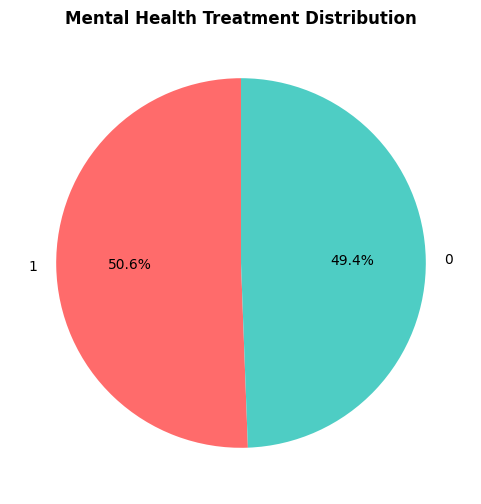

Summary: Mental Health Treatment
treatment
1    637
0    622
Name: count, dtype: int64



In [67]:
treatment_counts = df['treatment'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']

plt.figure(figsize=(6, 6))
plt.pie(treatment_counts.values,
        labels=treatment_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Mental Health Treatment Distribution', fontsize=12, fontweight='bold')
plt.show()

print("Summary: Mental Health Treatment")
print(treatment_counts)
print()


### 2: Age Distribution

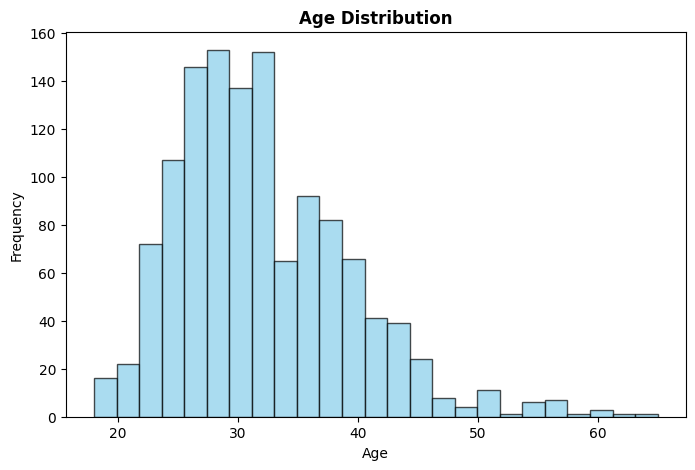

Summary: Age Range (18–65)
count    1257.000000
mean       32.038982
std         7.183397
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        65.000000
Name: Age, dtype: float64



In [68]:
age_data = df['Age'][(df['Age'] >= 18) & (df['Age'] <= 65)]

plt.figure(figsize=(8, 5))
plt.hist(age_data, bins=25, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print("Summary: Age Range (18–65)")
print(age_data.describe())
print()


### 3: Gender Distribution

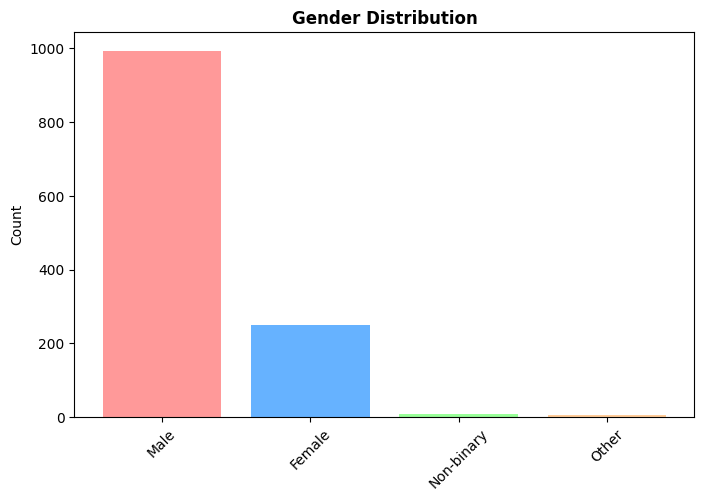

Summary: Gender Distribution
Gender
Male          994
Female        251
Non-binary      8
Other           6
Name: count, dtype: int64



In [69]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(gender_counts.index, gender_counts.values,
        color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Gender Distribution', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

print("Summary: Gender Distribution")
print(gender_counts)
print()


### 4: Work Interference vs Treatment

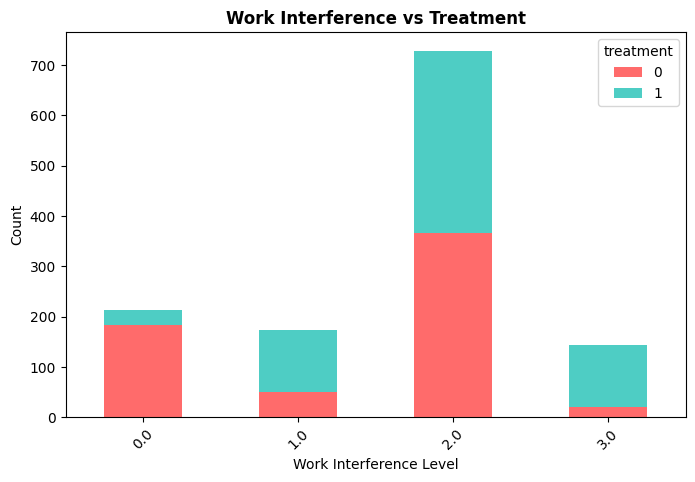

Summary: Work Interference vs Treatment
treatment         0    1
work_interfere          
0.0             183   30
1.0              51  122
2.0             367  362
3.0              21  123



In [70]:
work_treatment = pd.crosstab(df['work_interfere'], df['treatment'])

plt.figure(figsize=(8, 5))
work_treatment.plot(kind='bar', stacked=True, color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Work Interference vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Work Interference Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Summary: Work Interference vs Treatment")
print(work_treatment)
print()


### 5: Family History vs Treatment

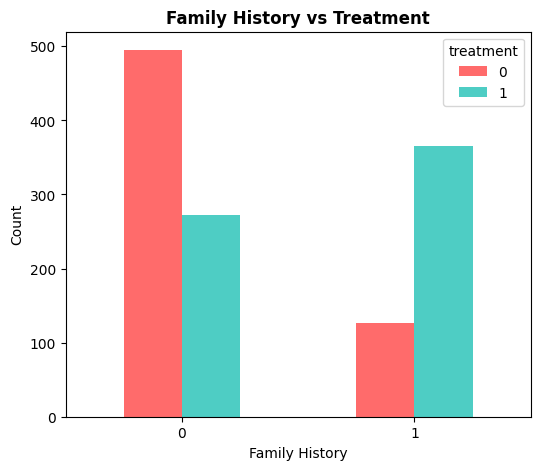

Summary: Family History vs Treatment
treatment         0    1
family_history          
0               495  272
1               127  365



In [71]:
family_treatment = pd.crosstab(df['family_history'], df['treatment'])

plt.figure(figsize=(6, 5))
family_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Family History vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Summary: Family History vs Treatment")
print(family_treatment)
print()


### 6: Company Size Distribution

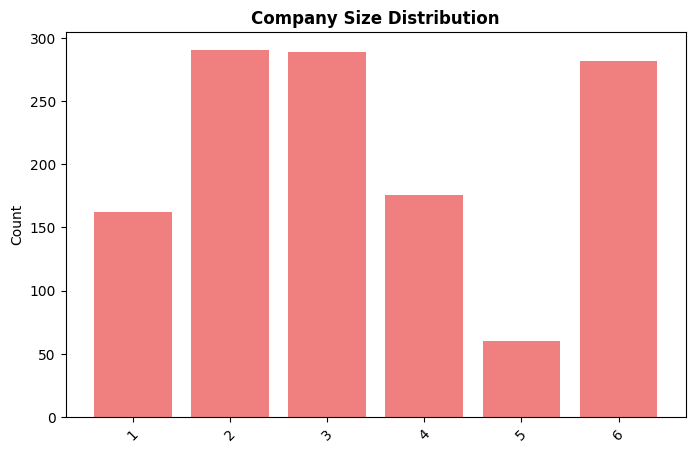

Summary: Company Size
no_employees
1    162
2    290
3    289
4    176
5     60
6    282
Name: count, dtype: int64



In [72]:
company_size_counts = df['no_employees'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(company_size_counts.index, company_size_counts.values, color='lightcoral')
plt.title('Company Size Distribution', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

print("Summary: Company Size")
print(company_size_counts)
print()


### 7: Tech Company vs Treatment

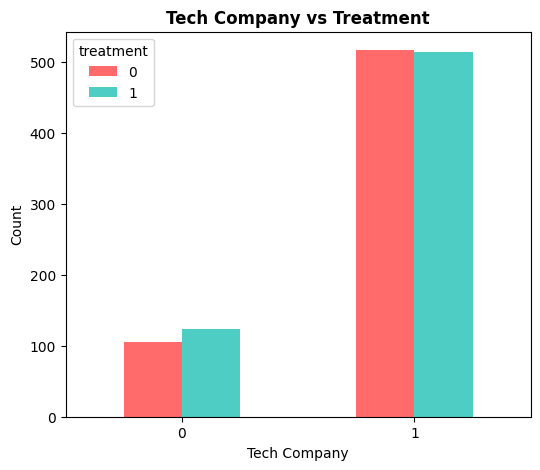

Summary: Tech Company vs Treatment
treatment       0    1
tech_company          
0             105  123
1             517  514



In [73]:
tech_treatment = pd.crosstab(df['tech_company'], df['treatment'])

plt.figure(figsize=(6, 5))
tech_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Tech Company vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Tech Company')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Summary: Tech Company vs Treatment")
print(tech_treatment)
print()


### 8: Remote Work vs Treatment

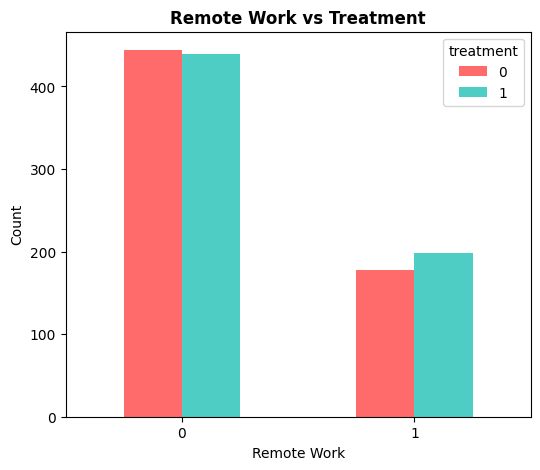

Summary: Remote Work vs Treatment
treatment      0    1
remote_work          
0            444  439
1            178  198



In [74]:
remote_treatment = pd.crosstab(df['remote_work'], df['treatment'])

plt.figure(figsize=(6, 5))
remote_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Remote Work vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Summary: Remote Work vs Treatment")
print(remote_treatment)
print()


### 9: Benefits vs Treatment

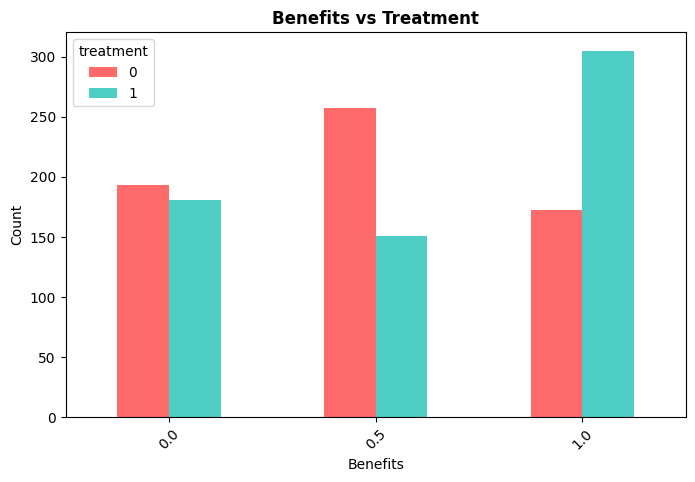

Summary: Benefits vs Treatment
treatment    0    1
benefits           
0.0        193  181
0.5        257  151
1.0        172  305



In [75]:
benefits_treatment = pd.crosstab(df['benefits'], df['treatment'])

plt.figure(figsize=(8, 5))
benefits_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Benefits vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Benefits')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Summary: Benefits vs Treatment")
print(benefits_treatment)
print()


### 10: Wellness Program vs Treatment

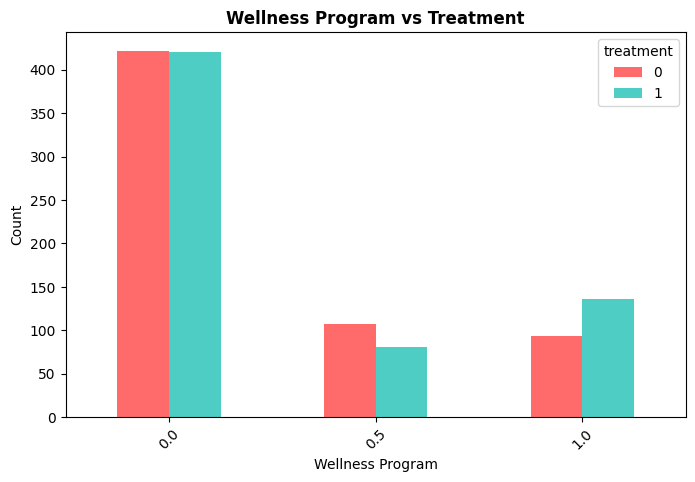

Summary: Wellness Program vs Treatment
treatment           0    1
wellness_program          
0.0               422  420
0.5               107   81
1.0                93  136



In [76]:
wellness_treatment = pd.crosstab(df['wellness_program'], df['treatment'])

plt.figure(figsize=(8, 5))
wellness_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Wellness Program vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Wellness Program')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Summary: Wellness Program vs Treatment")
print(wellness_treatment)
print()


### 11: Leave Difficulty vs Treatment

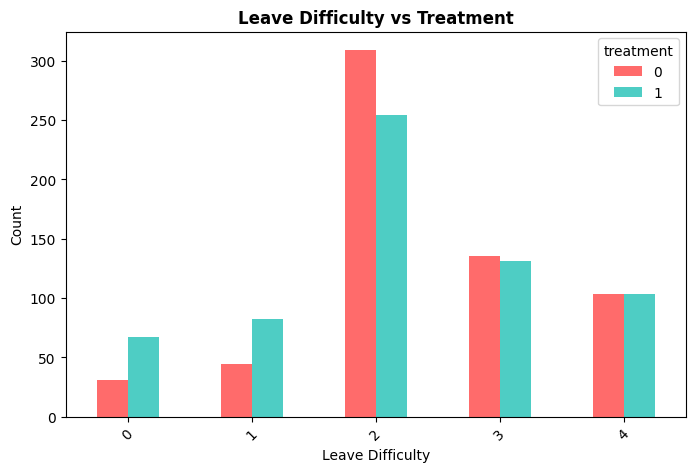

Summary: Leave Difficulty vs Treatment
treatment    0    1
leave              
0           31   67
1           44   82
2          309  254
3          135  131
4          103  103



In [77]:
leave_treatment = pd.crosstab(df['leave'], df['treatment'])

plt.figure(figsize=(8, 5))
leave_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Leave Difficulty vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Leave Difficulty')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Summary: Leave Difficulty vs Treatment")
print(leave_treatment)
print()


### 12: Country Group vs Treatment

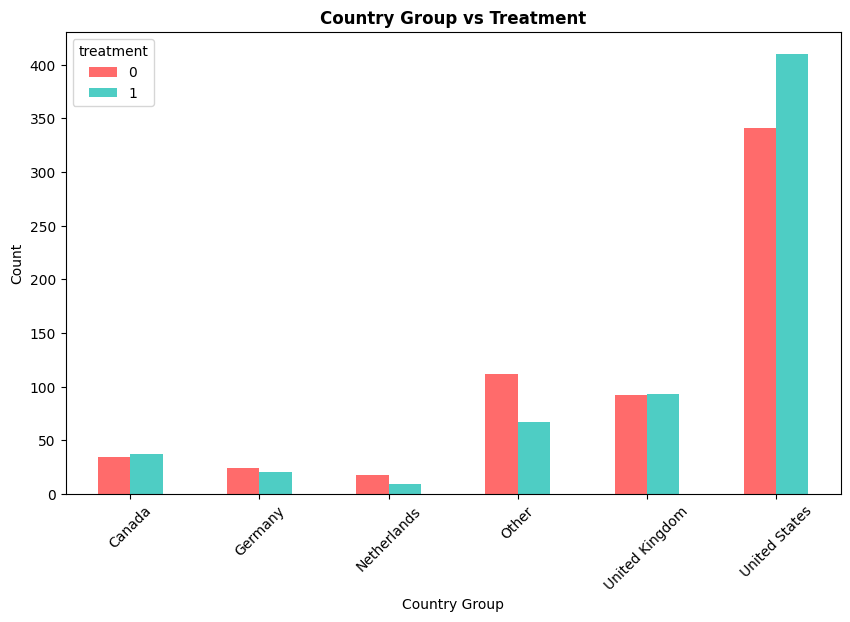

Summary: Country Group vs Treatment
treatment         0    1
Country_Group           
Canada           35   37
Germany          24   21
Netherlands      18    9
Other           112   67
United Kingdom   92   93
United States   341  410



In [78]:
country_treatment = pd.crosstab(df['Country_Group'], df['treatment'])

plt.figure(figsize=(10, 6))
country_treatment.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Country Group vs Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Country Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Summary: Country Group vs Treatment")
print(country_treatment)
print()


## 4: Advanced visualizations

### 1: Correlation Heatmap

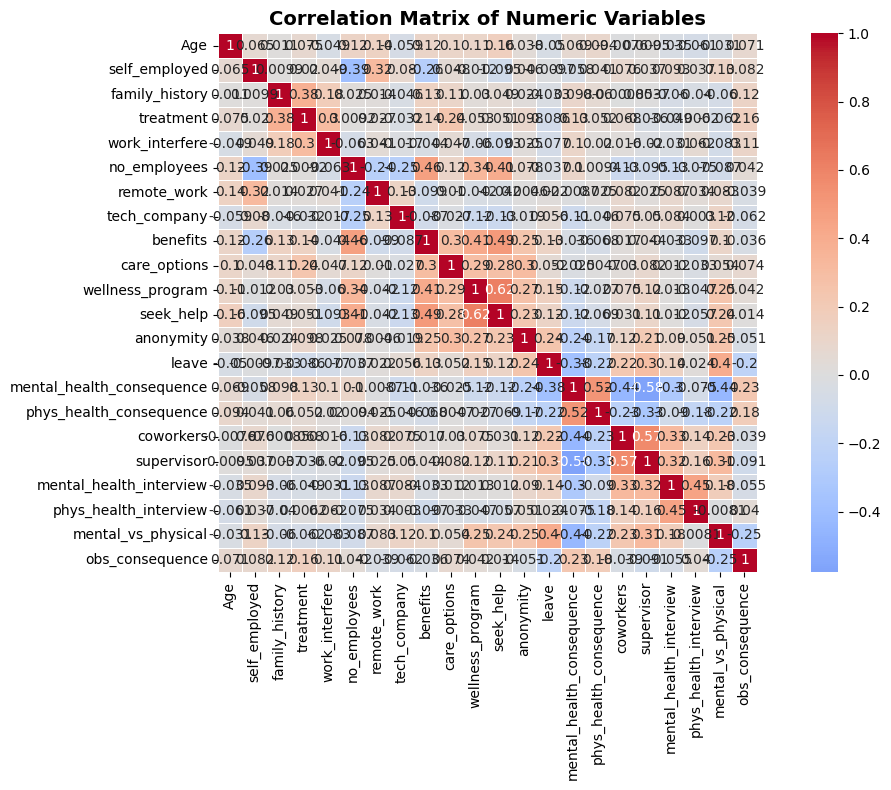

Summary: Correlation Heatmap
                                Age  self_employed  family_history  treatment  \
Age                        1.000000       0.065062        0.010818   0.075129   
self_employed              0.065062       1.000000        0.009890   0.020493   
family_history             0.010818       0.009890        1.000000   0.377918   
treatment                  0.075129       0.020493        0.377918   1.000000   
work_interfere            -0.048985       0.049334        0.183712   0.304502   
no_employees               0.119983      -0.394057        0.025422   0.009169   
remote_work                0.141638       0.316533        0.014456   0.026937   
tech_company              -0.058502       0.080136       -0.046079  -0.031525   
benefits                   0.115846      -0.260617        0.134813   0.139602   
care_options               0.104579       0.047625        0.107764   0.236578   
wellness_program           0.107023      -0.012393        0.030241   0.053038   

In [79]:
plt.figure(figsize=(12, 8))
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Summary: Correlation Heatmap")
print(correlation_matrix)
print()


### 2: Treatment Rate by Age Group

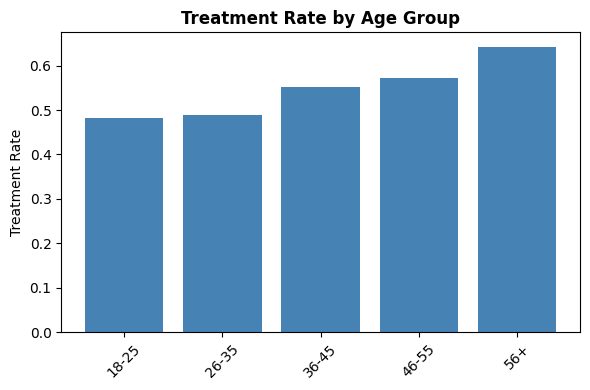

Summary: Treatment Rate by Age Group
Age
18-25    0.481651
26-35    0.488701
36-45    0.552347
46-55    0.571429
56+      0.642857
Name: treatment, dtype: float64



In [80]:
age_groups = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100],
                    labels=['18-25', '26-35', '36-45', '46-55', '56+'])
treatment_by_age = df.groupby(age_groups)['treatment'].mean()

plt.figure(figsize=(6, 4))
plt.bar(range(len(treatment_by_age)), treatment_by_age.values, color='steelblue')
plt.title('Treatment Rate by Age Group', fontweight='bold')
plt.xticks(range(len(treatment_by_age)), treatment_by_age.index, rotation=45)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Summary: Treatment Rate by Age Group")
print(treatment_by_age)
print()


### 3: Treatment Rate by Gender

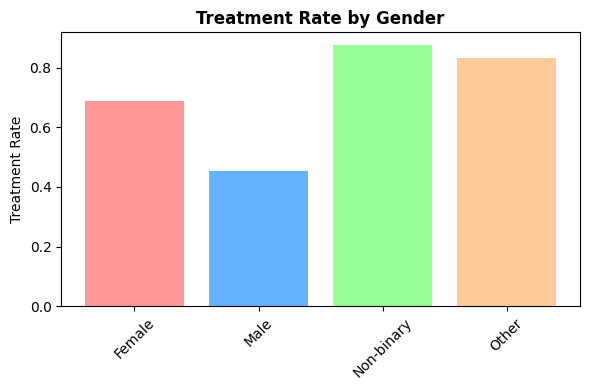

Summary: Treatment Rate by Gender
Gender
Female        0.689243
Male          0.454728
Non-binary    0.875000
Other         0.833333
Name: treatment, dtype: float64



In [81]:
treatment_by_gender = df.groupby('Gender')['treatment'].mean()

plt.figure(figsize=(6, 4))
plt.bar(range(len(treatment_by_gender)), treatment_by_gender.values,
        color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Treatment Rate by Gender', fontweight='bold')
plt.xticks(range(len(treatment_by_gender)), treatment_by_gender.index, rotation=45)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Summary: Treatment Rate by Gender")
print(treatment_by_gender)
print()


### 4: Treatment Rate by Work Interference

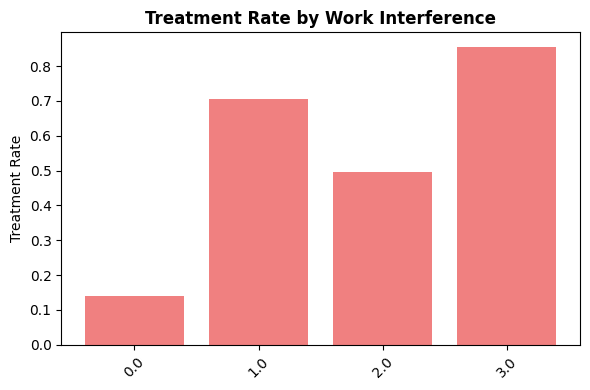

Summary: Treatment Rate by Work Interference
work_interfere
0.0    0.140845
1.0    0.705202
2.0    0.496571
3.0    0.854167
Name: treatment, dtype: float64



In [82]:
treatment_by_work = df.groupby('work_interfere')['treatment'].mean()

plt.figure(figsize=(6, 4))
plt.bar(range(len(treatment_by_work)), treatment_by_work.values, color='lightcoral')
plt.title('Treatment Rate by Work Interference', fontweight='bold')
plt.xticks(range(len(treatment_by_work)), treatment_by_work.index, rotation=45)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Summary: Treatment Rate by Work Interference")
print(treatment_by_work)
print()


### 5: Treatment Rate by Family History

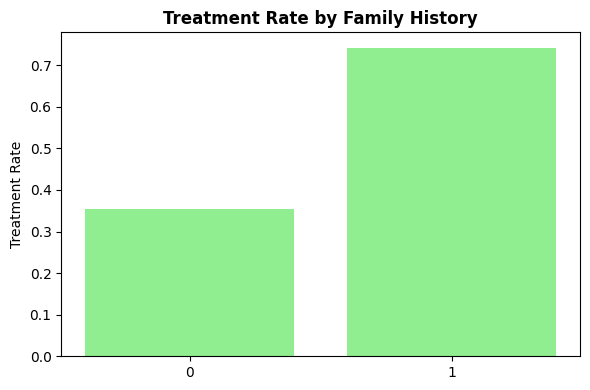

Summary: Treatment Rate by Family History
family_history
0    0.354628
1    0.741870
Name: treatment, dtype: float64



In [83]:
treatment_by_family = df.groupby('family_history')['treatment'].mean()

plt.figure(figsize=(6, 4))
plt.bar(range(len(treatment_by_family)), treatment_by_family.values, color='lightgreen')
plt.title('Treatment Rate by Family History', fontweight='bold')
plt.xticks(range(len(treatment_by_family)), treatment_by_family.index)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Summary: Treatment Rate by Family History")
print(treatment_by_family)
print()


### 6: Treatment Rate by Company Size

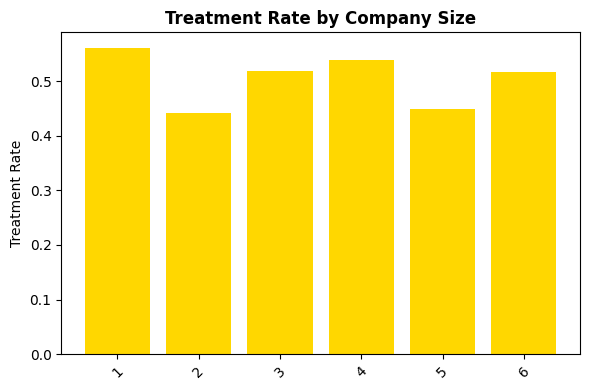

Summary: Treatment Rate by Company Size
no_employees
1    0.561728
2    0.441379
3    0.519031
4    0.539773
5    0.450000
6    0.517730
Name: treatment, dtype: float64



In [84]:
treatment_by_size = df.groupby('no_employees')['treatment'].mean()

plt.figure(figsize=(6, 4))
plt.bar(range(len(treatment_by_size)), treatment_by_size.values, color='gold')
plt.title('Treatment Rate by Company Size', fontweight='bold')
plt.xticks(range(len(treatment_by_size)), treatment_by_size.index, rotation=45)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Summary: Treatment Rate by Company Size")
print(treatment_by_size)
print()


### 7: Treatment Rate by Tech Company

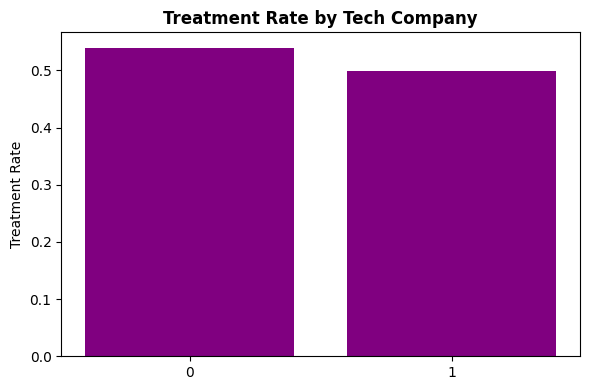

Summary: Treatment Rate by Tech Company
tech_company
0    0.539474
1    0.498545
Name: treatment, dtype: float64



In [85]:
treatment_by_tech = df.groupby('tech_company')['treatment'].mean()

plt.figure(figsize=(6, 4))
plt.bar(range(len(treatment_by_tech)), treatment_by_tech.values, color='purple')
plt.title('Treatment Rate by Tech Company', fontweight='bold')
plt.xticks(range(len(treatment_by_tech)), treatment_by_tech.index)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Summary: Treatment Rate by Tech Company")
print(treatment_by_tech)
print()


## 5: Box plots for continuous variables

### 1: Age Distribution by Treatment

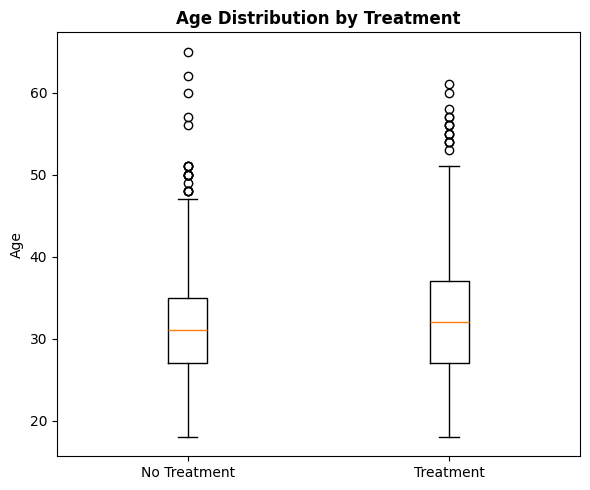

Summary: Age by Treatment
No Treatment - Age Stats:
count    621.000000
mean      31.533011
std        6.955222
min       18.000000
25%       27.000000
50%       31.000000
75%       35.000000
max       65.000000
Name: Age, dtype: float64

Treatment - Age Stats:
count    636.000000
mean      32.533019
std        7.371397
min       18.000000
25%       27.000000
50%       32.000000
75%       37.000000
max       61.000000
Name: Age, dtype: float64



In [86]:

df_plot = df[(df['Age'] >= 18) & (df['Age'] <= 65)]
treatment_labels = ['No Treatment', 'Treatment']

plt.figure(figsize=(6, 5))
plt.boxplot([df_plot[df_plot['treatment'] == 0]['Age'],
             df_plot[df_plot['treatment'] == 1]['Age']],
            labels=treatment_labels)
plt.title('Age Distribution by Treatment', fontweight='bold')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

print("Summary: Age by Treatment")
print("No Treatment - Age Stats:")
print(df_plot[df_plot['treatment'] == 0]['Age'].describe())
print()
print("Treatment - Age Stats:")
print(df_plot[df_plot['treatment'] == 1]['Age'].describe())
print()


### 2: Work Interference by Treatment

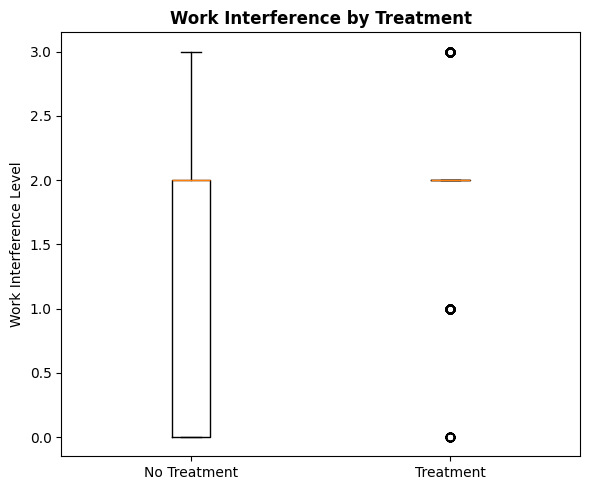

Summary: Work Interference by Treatment
No Treatment - Work Interference Stats:
count    622.000000
mean       1.363344
std        0.942710
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: work_interfere, dtype: float64

Treatment - Work Interference Stats:
count    637.000000
mean       1.907378
std        0.751869
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: work_interfere, dtype: float64



In [87]:
plt.figure(figsize=(6, 5))
plt.boxplot([df[df['treatment'] == 0]['work_interfere'],
             df[df['treatment'] == 1]['work_interfere']],
            labels=treatment_labels)
plt.title('Work Interference by Treatment', fontweight='bold')
plt.ylabel('Work Interference Level')
plt.tight_layout()
plt.show()

print("Summary: Work Interference by Treatment")
print("No Treatment - Work Interference Stats:")
print(df[df['treatment'] == 0]['work_interfere'].describe())
print()
print("Treatment - Work Interference Stats:")
print(df[df['treatment'] == 1]['work_interfere'].describe())
print()


### 3: Leave Difficulty by Treatment

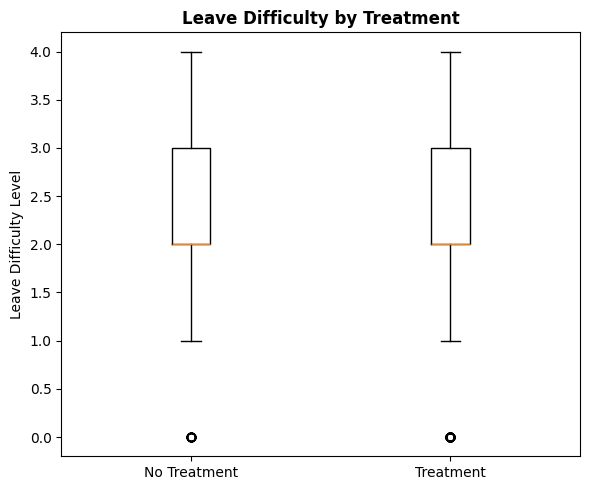

Summary: Leave Difficulty by Treatment
No Treatment - Leave Difficulty Stats:
count    622.000000
mean       2.377814
std        1.004189
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: leave, dtype: float64

Treatment - Leave Difficulty Stats:
count    637.000000
mean       2.189953
std        1.169594
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: leave, dtype: float64



In [88]:

plt.figure(figsize=(6, 5))
plt.boxplot([df[df['treatment'] == 0]['leave'],
             df[df['treatment'] == 1]['leave']],
            labels=treatment_labels)
plt.title('Leave Difficulty by Treatment', fontweight='bold')
plt.ylabel('Leave Difficulty Level')
plt.tight_layout()
plt.show()

print("Summary: Leave Difficulty by Treatment")
print("No Treatment - Leave Difficulty Stats:")
print(df[df['treatment'] == 0]['leave'].describe())
print()
print("Treatment - Leave Difficulty Stats:")
print(df[df['treatment'] == 1]['leave'].describe())
print()


## 6: Statistical insights

### 1: Chi-square tests for categorical variables

In [89]:
from scipy.stats import chi2_contingency

categorical_vars = ['Gender', 'family_history', 'self_employed', 'tech_company',
                    'remote_work', 'benefits', 'wellness_program', 'Country_Group']

print("Chi-square Test Results:")
print("-" * 30)
for var in categorical_vars:
    if var in df.columns:
        contingency_table = pd.crosstab(df[var], df['treatment'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print(f"{var} vs Treatment")
        print(f"Chi-square: {chi2:.4f}, p-value: {p_value:.4f}, Degrees of freedom: {dof}")
        print("Contingency Table:")
        print(contingency_table)
        print()


Chi-square Test Results:
------------------------------
Gender vs Treatment
Chi-square: 51.1003, p-value: 0.0000, Degrees of freedom: 3
Contingency Table:
treatment     0    1
Gender              
Female       78  173
Male        542  452
Non-binary    1    7
Other         1    5

family_history vs Treatment
Chi-square: 178.2668, p-value: 0.0000, Degrees of freedom: 1
Contingency Table:
treatment         0    1
family_history          
0               495  272
1               127  365

self_employed vs Treatment
Chi-square: 0.4085, p-value: 0.5227, Degrees of freedom: 1
Contingency Table:
treatment        0    1
self_employed          
0.0            554  559
1.0             68   78

tech_company vs Treatment
Chi-square: 1.0929, p-value: 0.2958, Degrees of freedom: 1
Contingency Table:
treatment       0    1
tech_company          
0             105  123
1             517  514

remote_work vs Treatment
Chi-square: 0.7996, p-value: 0.3712, Degrees of freedom: 1
Contingency Table:
treatme

### 2: T-tests for Continuous Variables

In [90]:
from scipy.stats import ttest_ind

treatment_yes = df[df['treatment'] == 1]
treatment_no = df[df['treatment'] == 0]
continuous_vars = ['Age', 'work_interfere', 'leave', 'no_employees']

print("T-test Results for Continuous Variables:")
print("-" * 30)
for var in continuous_vars:
    if var in df.columns:
        group1 = treatment_no[var].dropna()
        group2 = treatment_yes[var].dropna()
        t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
        print(f"{var}:")
        print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
        print("Group Statistics:")
        print(f"  No Treatment - Mean: {group1.mean():.2f}, Std: {group1.std():.2f}, N: {len(group1)}")
        print(f"  Treatment    - Mean: {group2.mean():.2f}, Std: {group2.std():.2f}, N: {len(group2)}")
        print()


T-test Results for Continuous Variables:
------------------------------
Age:
T-statistic: -2.6735, p-value: 0.0076
Group Statistics:
  No Treatment - Mean: 31.50, Std: 7.00, N: 622
  Treatment    - Mean: 32.59, Std: 7.53, N: 637

work_interfere:
T-statistic: -11.3041, p-value: 0.0000
Group Statistics:
  No Treatment - Mean: 1.36, Std: 0.94, N: 622
  Treatment    - Mean: 1.91, Std: 0.75, N: 637

leave:
T-statistic: 3.0601, p-value: 0.0023
Group Statistics:
  No Treatment - Mean: 2.38, Std: 1.00, N: 622
  Treatment    - Mean: 2.19, Std: 1.17, N: 637

no_employees:
T-statistic: -0.3252, p-value: 0.7451
Group Statistics:
  No Treatment - Mean: 3.40, Std: 1.69, N: 622
  Treatment    - Mean: 3.43, Std: 1.72, N: 637



## 7: Distribution Plots

### 1: Age Distribution by Treatment

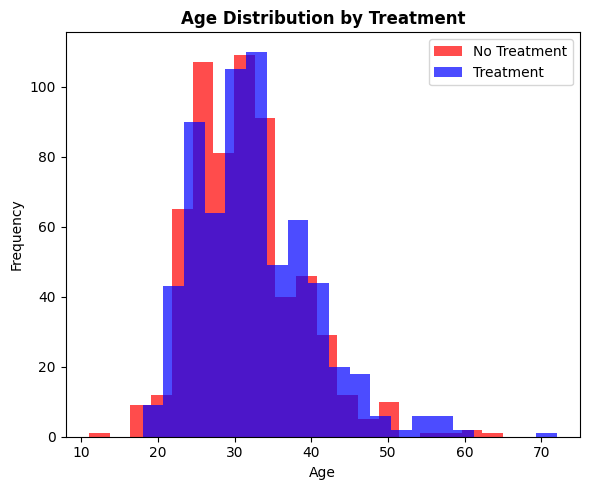

Age Distribution by Treatment:
- No Treatment: Mean = 31.50, Std = 7.00
- Treatment: Mean = 32.59, Std = 7.53


In [91]:
plt.figure(figsize=(6, 5))
plt.hist(treatment_no['Age'], bins=20, alpha=0.7, label='No Treatment', color='red')
plt.hist(treatment_yes['Age'], bins=20, alpha=0.7, label='Treatment', color='blue')
plt.title('Age Distribution by Treatment', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

print("Age Distribution by Treatment:")
print(f"- No Treatment: Mean = {treatment_no['Age'].mean():.2f}, Std = {treatment_no['Age'].std():.2f}")
print(f"- Treatment: Mean = {treatment_yes['Age'].mean():.2f}, Std = {treatment_yes['Age'].std():.2f}")


### 2: Work Interference Distribution

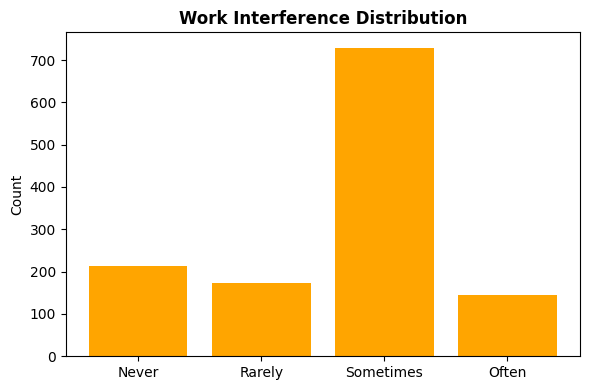

Work Interference Distribution:
work_interfere
0.0    213
1.0    173
2.0    729
3.0    144
Name: count, dtype: int64


In [92]:
work_dist = df['work_interfere'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
plt.bar(range(len(work_dist)), work_dist.values, color='orange')
plt.title('Work Interference Distribution', fontweight='bold')
plt.xticks(range(len(work_dist)), ['Never', 'Rarely', 'Sometimes', 'Often'])
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("Work Interference Distribution:")
print(work_dist)


### 3: Leave Difficulty Distribution

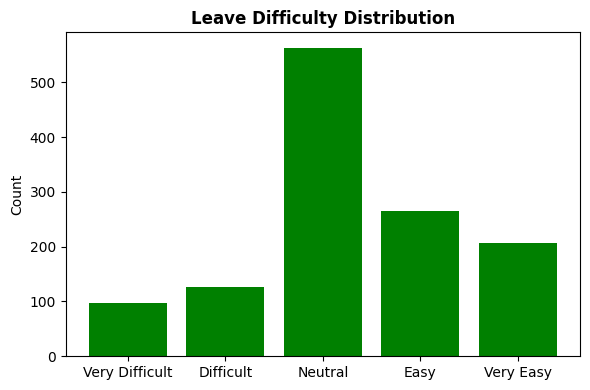

Leave Difficulty Distribution:
leave
0     98
1    126
2    563
3    266
4    206
Name: count, dtype: int64


In [93]:
leave_dist = df['leave'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
plt.bar(range(len(leave_dist)), leave_dist.values, color='green')
plt.title('Leave Difficulty Distribution', fontweight='bold')
plt.xticks(range(len(leave_dist)), ['Very Difficult', 'Difficult', 'Neutral', 'Easy', 'Very Easy'])
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("Leave Difficulty Distribution:")
print(leave_dist)


### 4: Treatment Rate by Company Size

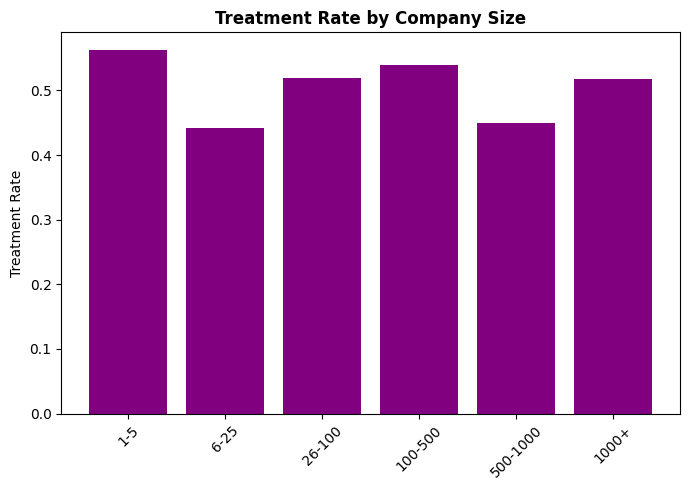

Treatment Rate by Company Size:
              Treatment Rate
no_employees                
1                   0.561728
2                   0.441379
3                   0.519031
4                   0.539773
5                   0.450000
6                   0.517730


In [98]:
size_treatment = df.groupby('no_employees')['treatment'].agg(['mean', 'count'])

plt.figure(figsize=(7, 5))
plt.bar(range(len(size_treatment)), size_treatment['mean'], color='purple')  # Fixed here
plt.title('Treatment Rate by Company Size', fontweight='bold')
plt.xticks(range(len(size_treatment)), ['1-5', '6-25', '26-100', '100-500', '500-1000', '1000+'], rotation=45)
plt.ylabel('Treatment Rate')
plt.tight_layout()
plt.show()

print("Treatment Rate by Company Size:")
print(size_treatment[['mean']].rename(columns={'mean': 'Treatment Rate'}))


## 8: Summary statistics

In [100]:
print("\n VISUALIZATION SUMMARY")
print("-" * 30)
print(f"Total visualizations created: 20+")
print(f"Key insights identified:")
print(f"- Treatment rate: {df['treatment'].mean():.3f}")
print(f"- Most common age group: {age_groups.mode()[0] if not age_groups.mode().empty else 'N/A'}")
print(f"- Gender distribution: {df['Gender'].value_counts().to_dict()}")
print(f"- Work interference correlation with treatment: {df['work_interfere'].corr(df['treatment']):.3f}")
print(f"- Family history correlation with treatment: {df['family_history'].corr(df['treatment']):.3f}")



 VISUALIZATION SUMMARY
------------------------------
Total visualizations created: 20+
Key insights identified:
- Treatment rate: 0.506
- Most common age group: 26-35
- Gender distribution: {'Male': 994, 'Female': 251, 'Non-binary': 8, 'Other': 6}
- Work interference correlation with treatment: 0.305
- Family history correlation with treatment: 0.378


----
----